# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [41]:
import pandas as pd

df = pd.read_csv('data/human_body_temperature.csv')

In [42]:
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


In [44]:
import matplotlib.pyplot as plt
import numpy as np

In [45]:
mean = np.mean(df.temperature)
std = np.std(df.temperature)
print(mean)
print(std)

98.24923076923078
0.7303577789050377


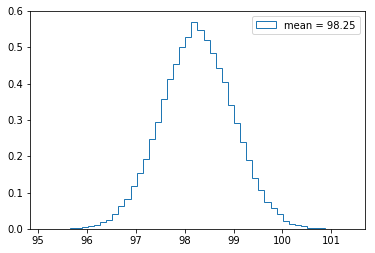

In [57]:
#1 - Is the distribution of body temperatures normal? 
samples = np.random.normal(98.25, 0.73, size=100000)
plt.hist(samples, bins=50, normed=True, histtype='step')
_ = plt.legend(('mean = 98.25', 'std = 0.73'))
plt.show()

In [56]:
#2 - Is the sample size large? Are the observations independent? 
df.shape

(130, 3)

In [ ]:
# There are 130 observations. It seems like a large enough sample size. I am not sure how to test for 
# independent observations

In [70]:
#3 - Is the true population mean really 98.6 degrees F? 
# In this case I will use a one sample test as I am comparing the mean of the population (98.6) with the mean from
# the data that I have. I do not have the complete data for the population

def bootstrap_replicate_1d(data, func):
    return func(np.random.choice(data, size=len(data)))

def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)

    return bs_replicates

translated_df_temperature = df.temperature - np.mean(df.temperature) + 98.6

# Take bootstrap replicates of Frog B's translated impact forces: bs_replicates
bs_replicates = draw_bs_reps(translated_df_temperature, np.mean, 10000)

# Compute fraction of replicates that are less than the observed Frog B force: p
p = np.sum(bs_replicates <= np.mean(df.temperature)) / 10000

# Print the p-value
print('p = ', p)

p =  0.0


In [71]:
# In this situation it is appropriate to use the t-statistic. We cannot use the z statistic as the we do not have 
# the population numbers

In [109]:
#4 - Draw a small sample of size 10 from the data and repeat both frequentist tests

df_10 = np.random.choice(df.temperature, size=10)

#print(np.mean(df.temperature))
#print(np.mean(df_10))

# One-sample bootstrap test

translated_df_10 = df_10 - np.mean(df_10) + 98.25

# Take bootstrap replicates of Frog B's translated impact forces: bs_replicates
bs_replicates = draw_bs_reps(translated_df_10, np.mean, 10000)

# Compute fraction of replicates that are less than the observed Frog B force: p
p = np.sum(bs_replicates <= np.mean(df_10)) / 10000

# Print the p-value
print('p = ', p)

# Two-sample bootstrap test

# Compute mean of all forces: mean_force
mean_force = np.mean(df.temperature)

empirical_diff_means = np.mean(df.temperature) - np.mean(df_10)

# Generate shifted arrays
df_shifted = df.temperature - np.mean(df.temperature) + mean_force
df_10_shifted = df_10 - np.mean(df_10) + mean_force

# Compute 10,000 bootstrap replicates from shifted arrays
bs_replicates_a = draw_bs_reps(df_shifted, np.mean, size=10000)
bs_replicates_b = draw_bs_reps(df_10_shifted, np.mean, size=10000)

# Get replicates of difference of means: bs_replicates
bs_replicates = bs_replicates_a - bs_replicates_b

# Compute and print p-value: p
p = np.sum(bs_replicates >= empirical_diff_means) / len(bs_replicates)
print('p-value =', p)

p =  0.0203
p-value = 0.1007


In [ ]:
# We should use 2-sample bootstrap test in this case. The z-test would be appropriate in this case.

0.06405661469519336
0.23162444997020476
95% confidence interval = [97.79 98.71] games


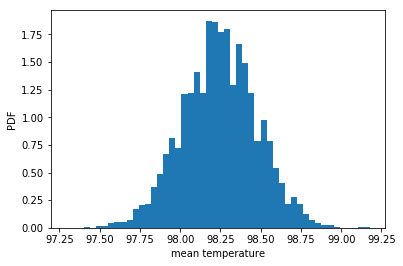

In [117]:
#5 - At what temperature should we consider someone's temperature to be "abnormal"? 
# Take 10,000 bootstrap replicates of the mean: bs_replicates
bs_replicates = draw_bs_reps(df.temperature, np.mean, 10000)

# Compute and print SEM
sem = np.std(df.temperature) / np.sqrt(len(df.temperature))
print(sem)

# Compute and print standard deviation of bootstrap replicates
bs_std = np.std(bs_replicates)
print(bs_std)

# Compute the 95% confidence interval: conf_int
conf_int = np.percentile(bs_replicates, [2.5, 97.5])

# Print the confidence interval
print('95% confidence interval =', conf_int, 'games')

# Make a histogram of the results
_ = plt.hist(bs_replicates, bins=50, normed=True)
_ = plt.xlabel('mean temperature')
_ = plt.ylabel('PDF')

# Show the plot
plt.show()

In [ ]:
# Based on 95% CI, if anyone's temperature is less than or equal to 97.79 or greater than or equal to 98.71, it 
# would be considered as "abnormal"

In [125]:
#6 - Is there a significant difference between males and females in normal temperature? 

df_male = df[df['gender'] == 'M']
df_female = df[df['gender'] == 'F']

diff_means = np.mean(df_male.temperature) - np.mean(df_female.temperature)

# Compute mean of pooled data: mean_count
mean_count = np.mean(df.temperature)

# Generate shifted data sets
control_shifted = df_male.temperature - np.mean(df_male.temperature) + mean_count
treated_shifted = df_female.temperature - np.mean(df_female.temperature) + mean_count

# Generate bootstrap replicates
bs_reps_control = draw_bs_reps(control_shifted,
                       np.mean, size=10000)
bs_reps_treated = draw_bs_reps(treated_shifted,
                       np.mean, size=10000)

# Get replicates of difference of means: bs_replicates
bs_replicates = bs_reps_control - bs_reps_treated

# Compute and print p-value: p
p = np.sum(bs_replicates >= np.mean(df_male.temperature) - np.mean(df_female.temperature)) \
            / len(bs_replicates)
print('p-value =', p)


p-value = 0.8092


In [126]:
# There is no significant difference in the temperatures between males and females

In [ ]:
# Conclusion: The temperature has a normal distribution with no difference in the temperatures for males and females
# The mean temperature of 98.6 is different from the mean temperature in the data (98.25). Maybe the scale used to 
# measure these temperatures was different - Celsius instead of Fahrenheit.